In [1]:
import urllib.request
import pandas as pd
import re


# Aufgabe 3

## Merging

Führe einen "right", "inner" und einen "outer" Merge durch und schaue Dir die Ergebnisse dieser an.

In [2]:

doiJ = pd.DataFrame({
    "DOI": ["10.1371/journal.pcbi.1004668",
            "10.21105/joss.01035",
            "10.12688/f1000research.18866.2",
            "10.1038/s41598-019-52881-4",
            "10.1186/s12859-019-3171-0"],
    "journal": ["PLoS Comput Biol",
                "JOSS",
                "F1000Res",
                "Sci Rep",
                "BMC Bioinformatics"]
})

doiFA = pd.DataFrame({
    "DOI": ["10.1371/journal.pcbi.1004668",
            "10.21105/joss.01035",
            "10.21105/joss.01006",
            "10.12688/f1000research.18866.2",
            "10.1186/s12859-019-3171-0"],
    "first_author": ["Blischak",
                     "Sparks",
                     "Granger",
                     "Thang",
                     "Chen"]
})


pd.merge(doiFA, doiJ, how = 'right', on = 'DOI')

,DOI,first_author,journal
0,10.1371/journal.pcbi.1004668,Blischak,PLoS Comput Biol
1,10.21105/joss.01035,Sparks,JOSS
2,10.12688/f1000research.18866.2,Thang,F1000Res
3,10.1038/s41598-019-52881-4,NaN,Sci Rep
4,10.1186/s12859-019-3171-0,Chen,BMC Bioinformatics


In [3]:
pd.merge(doiJ, doiFA, how = 'right', on = 'DOI')

,DOI,journal,first_author
0,10.1371/journal.pcbi.1004668,PLoS Comput Biol,Blischak
1,10.21105/joss.01035,JOSS,Sparks
2,10.21105/joss.01006,NaN,Granger
3,10.12688/f1000research.18866.2,F1000Res,Thang
4,10.1186/s12859-019-3171-0,BMC Bioinformatics,Chen


In [4]:
pd.merge(doiJ, doiFA, how = 'inner')

,DOI,journal,first_author
0,10.1371/journal.pcbi.1004668,PLoS Comput Biol,Blischak
1,10.21105/joss.01035,JOSS,Sparks
2,10.12688/f1000research.18866.2,F1000Res,Thang
3,10.1186/s12859-019-3171-0,BMC Bioinformatics,Chen


In [5]:
pd.merge(doiJ, doiFA, how = 'outer')

,DOI,journal,first_author
0,10.1371/journal.pcbi.1004668,PLoS Comput Biol,Blischak
1,10.21105/joss.01035,JOSS,Sparks
2,10.12688/f1000research.18866.2,F1000Res,Thang
3,10.1038/s41598-019-52881-4,Sci Rep,NaN
4,10.1186/s12859-019-3171-0,BMC Bioinformatics,Chen
5,10.21105/joss.01006,NaN,Granger



- `right`: die Anordnung der Spalten des Ergebnisdataframes ist abhängig von der Reihenfolge im `merge`-Befehl; Einträge, die nicht zugeordnet werden können, werden mit `NaN` aufgefüllt
- `inner`: nur Zeilen, die in beiden Datensätzen eine Entsprechung haben, werden ausgegeben
- `outer`: alle Zeilen werden ausgegeben, entstehende Leerstellen werden mit `NaN` gefüllt


## Seattle Library

Erstellt ein neues Jupyter Notebook und überlegt euch für die Aufgabe **drei** Fragen, die ihr mittels einer Analyse mit Pandas auf die Daten anwenden könnt. Visualisiert eure Analysen durch tabellarische Form oder ein Histogramm.

- [x] neues Jupy
- [x] 1. Frage: In welchem Jahr (insofern vorhanden) erschien das erste digitale Medium in der Sammlung?
- [x] 2. Frage: Wieviele Einträge in dem Datensatz sind in puncto Ausleihhäufigkeit als statistische Ausreißer zu betrachten? Welche sind keine?
- [x] 3. Frage: Welche sind die Top10 der längsten Titel?
- [ ] 4. Frage: Publikationsjahr der ausgeliehenen Medien -> Visualisierung?!


In [6]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
co = "checkout.csv"
urllib.request.urlretrieve(url, co)
codf = pd.read_csv(co)
#codf

In [7]:
sub1 = codf.loc[codf['usageclass'] == 'Digital']
answerQ1 = sub1['publicationyear'].dropna().min()

In [8]:
codf
a = codf['checkouts'].describe() #hist(bins = 100)


In [9]:
comax = a['mean'] + (a['std']*4)
comin = a['mean'] - (a['std']*4)
dfNoOutlier = codf.loc[(codf['checkouts'] < comax) & (codf['checkouts'] > comin)]
answerQ2 = len(codf) - len(dfNoOutlier)
dfNoOutlier


,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


Als Ausreißer müssen 

In [10]:
answerQ2

47

Einträge angesehen werden.

In [11]:
#dfOutlier
dfOutlier = codf.loc[(codf['checkouts'] > comax) | (codf['checkouts'] < comin)]

titleLen = [len(i.split('/')[0]) for i in dfNoOutlier['title']]

titleLen = pd.DataFrame({'title length' : titleLen})
dfNoOutlier2 = dfNoOutlier.reset_index()
x = pd.concat([dfNoOutlier2, titleLen], axis = 1)
x = x.sort_values(by=['title length'], ascending = False)
x.iloc[0:10]

,index,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear,title length
2359,2370,Physical,Horizon,BOOK,2018,1,3,EFT for weight loss : the revolutionary techni...,NaN,"Church, Dawson, 1956-","Weight loss, Emotional Freedom Techniques, Eat...","Energy Psychology Press,",[2013],220
3413,3430,Physical,Horizon,BOOK,2018,1,1,"Eat the city : a tale of the fishers, trappers...",NaN,"Shulman, Robin","Food supply New York State New York History, N...","Crown,",[2012],202
5887,5912,Physical,Horizon,BOOK,2018,1,1,On the nature of food allergy : a complete han...,NaN,"Hannaway, Paul J.",Food allergy,"Lighthouse Press,",[2007],198
8897,8940,Digital,OverDrive,AUDIOBOOK,2018,1,1,"An American Family Shakespeare Entertainment, ...",NaN,Stefan Rudnicki,"Classic Literature, Fiction","Blackstone Audio, Inc.",2008,195
6044,6070,Physical,Horizon,BOOK,2018,1,4,The Landmark Julius Caesar : the complete work...,NaN,NaN,"Caesar Julius, Gaul History Gallic Wars 58 51 ...","Pantheon Books,",©2017.,195
9828,9875,Physical,Horizon,SOUNDDISC,2018,1,1,Hothouse stomp : the music of 1920s Chicago an...,NaN,Brian Carpenter's Ghost Train Orchestra,"Jazz 1921 1930, Jazz 2001 2010, Ragtime music,...","Accurate,",[2010],194
5117,5138,Digital,OverDrive,EBOOK,2018,1,1,My First New York: Early Adventures in the Big...,NaN,New York Magazine,"Nonfiction, Travel",HarperCollins Publishers Inc.,2013,192
8305,8348,Physical,Horizon,BOOK,2018,1,1,Will you be alive 10 years from now? : and num...,NaN,"Nahin, Paul J.",Probabilities Problems exercises etc,"Princeton University Press,",[2014],190
4600,4619,Digital,OverDrive,AUDIOBOOK,2018,1,3,"Princess in Black Series, Books 1-3: The Princ...",NaN,Shannon Hale,"Juvenile Fiction, Juvenile Literature",Books on Tape,2016,188
5261,5282,Physical,Horizon,BOOK,2018,1,4,"The low-FODMAP diet cookbook : 150 simple, fla...",NaN,"Shepherd, Sue",Digestive organs Diseases Diet therapy Recipes...,"The Experiment,",[2014],187


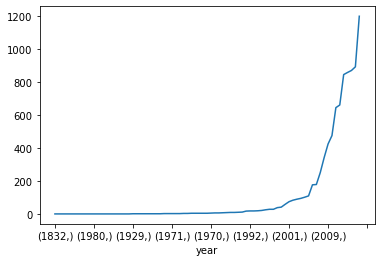

In [12]:

# subset pub year
py = codf['publicationyear']
# clean entries (rm all what's not number)
pyn = [ re.sub(r'[^\d/]', '', str(i)) for i in py ]

# just take YYYY
pynn = [int(i) for i in pyn if len(i) == 4]

# less struggle to plot
pynn = pd.DataFrame({'year':pynn})

#pynn.hist() ## <- boring
answerQ4 = pynn.value_counts()[::-1].plot()
